In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Housing.csv to Housing (1).csv


In [ ]:
df = pd.read_csv('Housing.csv')

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
y=df['price']
X=df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']]


In [ ]:
df.shape

(545, 13)

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,1.046726,1.403419,1.421812,1.378217,1,0,0,0,1,1.517692,1,1.0
1,12250000,1.757010,1.403419,5.405809,2.532024,1,0,0,0,1,2.679409,0,1.0
2,12250000,2.218232,0.047278,1.421812,0.224410,1,0,1,0,0,1.517692,1,0.5
3,12215000,1.083624,1.403419,1.421812,0.224410,1,0,1,0,1,2.679409,1,1.0
4,11410000,1.046726,1.403419,-0.570187,0.224410,1,1,1,0,1,1.517692,0,1.0


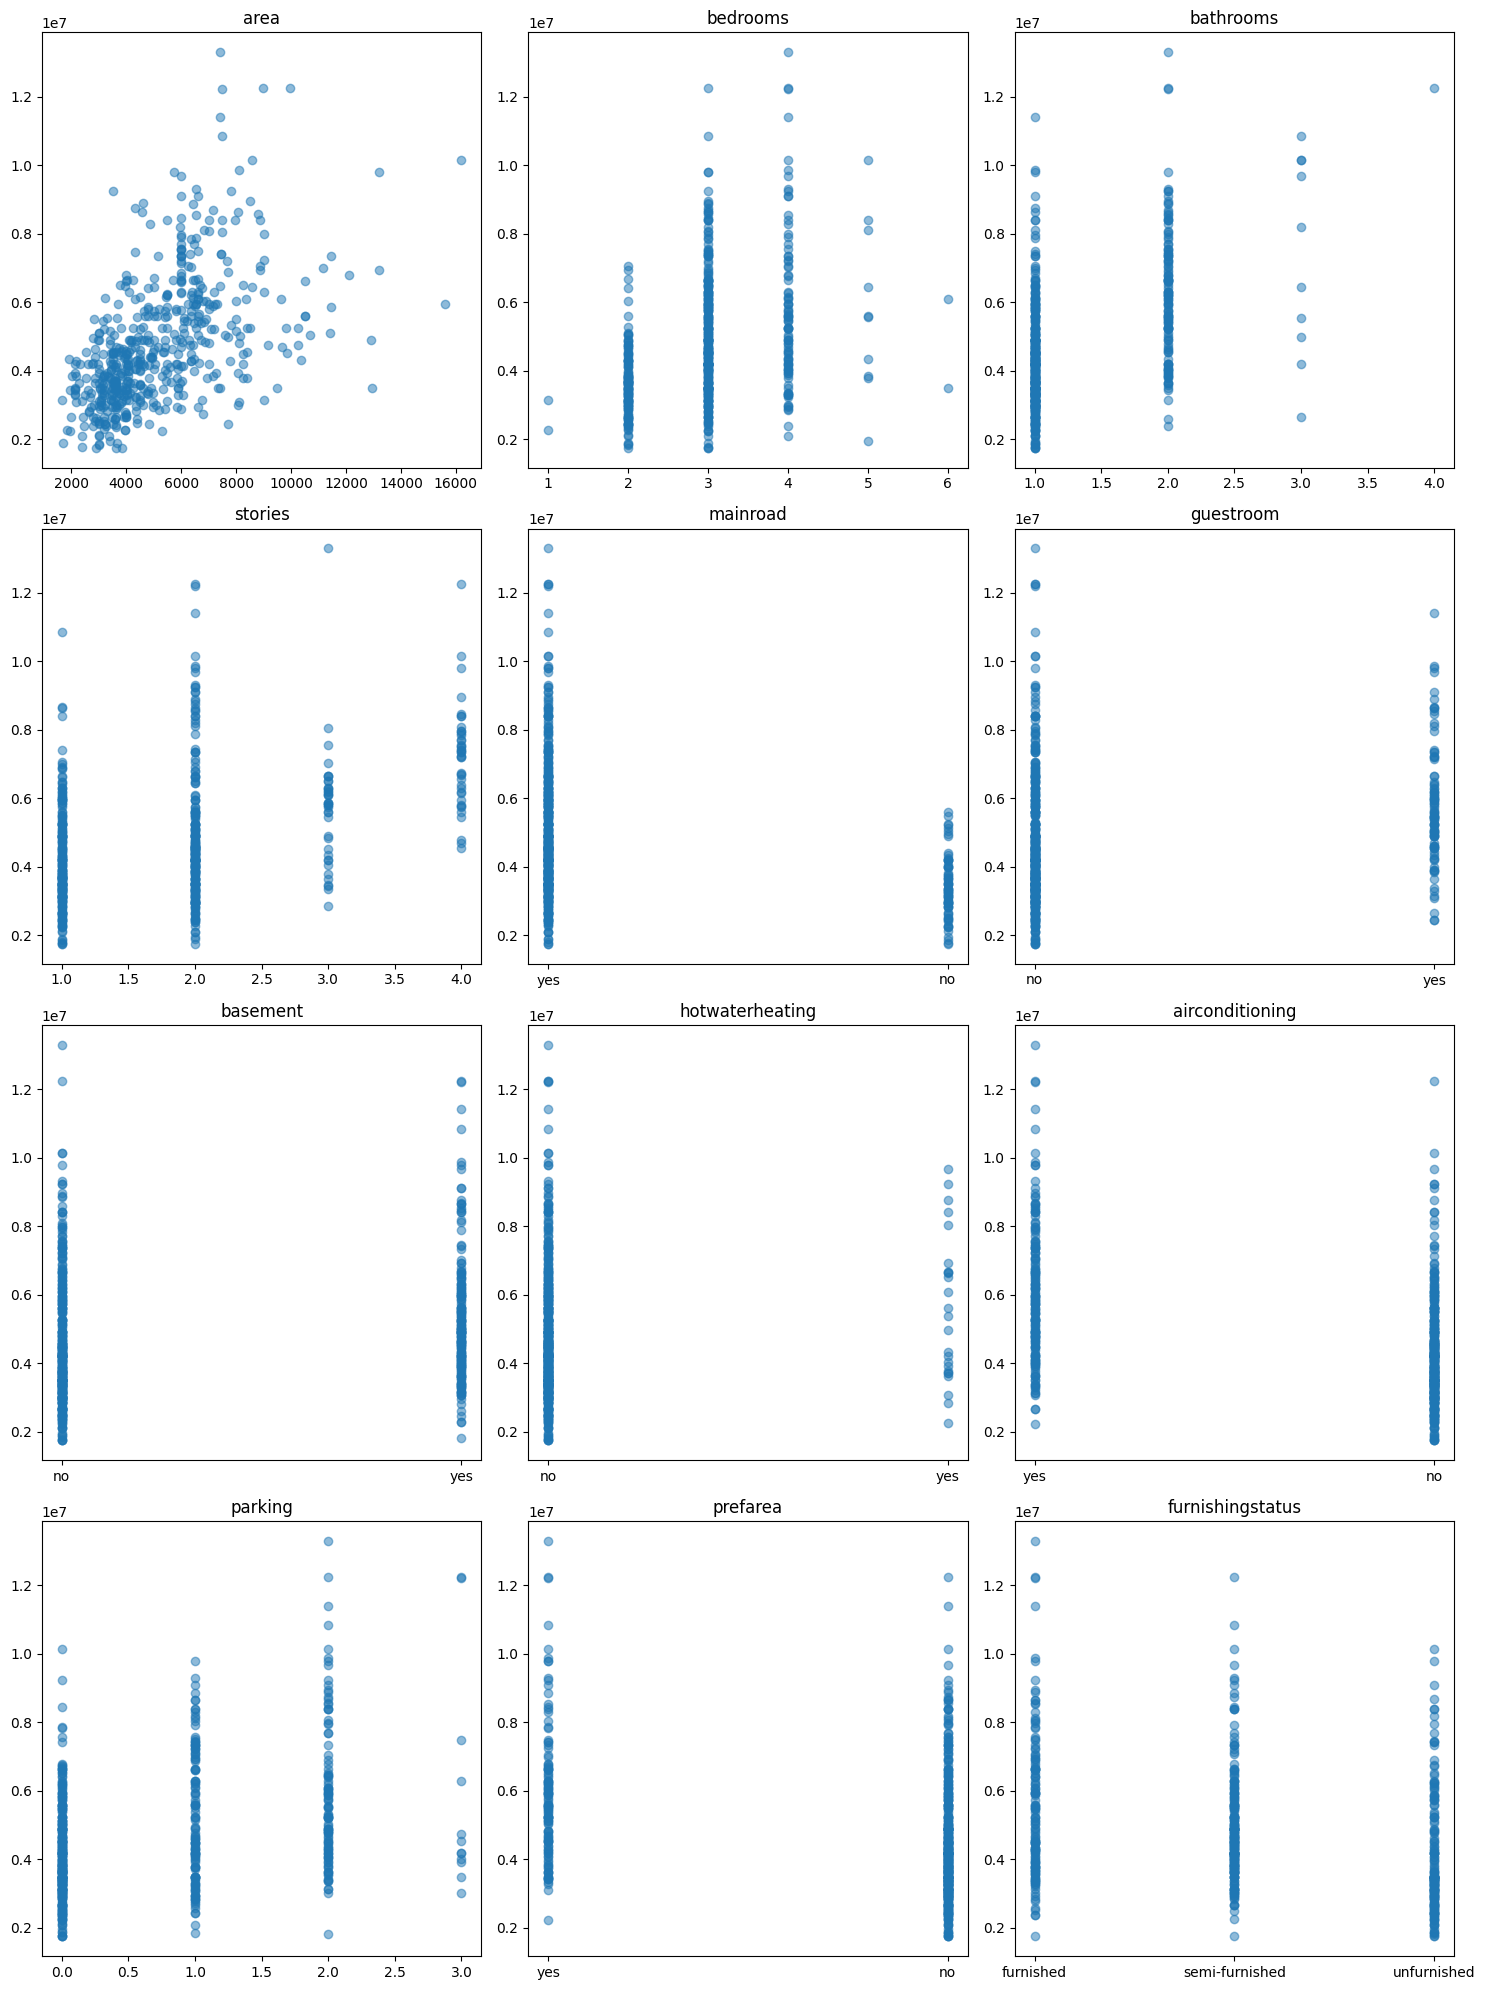

In [ ]:
import matplotlib.pyplot as plt

X_columns = X.columns
num_columns = len(X_columns)

rows = (num_columns // 3) + (num_columns % 3 > 0)
cols = 3

plt.figure(figsize=(15, rows * 5))

for i, column in enumerate(X_columns):
    plt.subplot(rows, cols, i + 1)
    plt.scatter(X[column], y, alpha=0.5)
    plt.title(column)

plt.tight_layout()
plt.show()


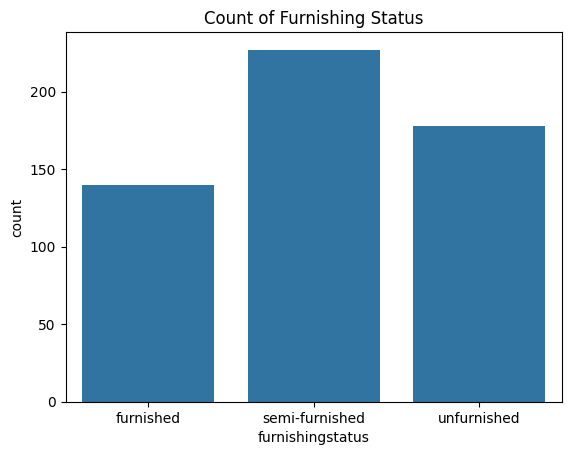

In [ ]:
import seaborn as sns

sns.countplot(x=df['furnishingstatus'], data=df)
plt.title("Count of Furnishing Status")
plt.show()


In [ ]:
binary_colums = ['mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
        'prefarea' ]

for col in binary_colums:
  df[col] = df[col].map({"yes":1,"no":0})

df['furnishingstatus'] = df['furnishingstatus'].map({"furnished":1,"semi-furnished":0.5,"unfurnished":0})

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.5
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1.0


In [ ]:
X=df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']]

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
X_train.shape

(381, 12)

In [ ]:
X.shape

(545, 12)

In [ ]:
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
126,7160,3,1,1,1,0,1,0,0,2,1,0.0
363,3584,2,1,1,1,0,0,1,0,0,0,0.5
370,4280,2,1,1,1,0,0,0,1,2,0,0.5
31,7000,3,1,4,1,0,0,0,1,2,0,0.5
113,9620,3,1,1,1,0,1,0,0,2,1,1.0


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print("Mean Squared Error: ",mse)
print("Coefficient of Determination: ",r2)

Mean Squared Error:  1535047758428.0496
Coefficient of Determination:  0.6435419628959107


In [ ]:
new_data = pd.DataFrame({
    "area": [8500],
    "bedrooms": [3],
    "bathrooms": [2],
    "stories": [2],
    "mainroad": [1],
    "guestroom": [0],
    "basement": [1],
    "hotwaterheating": [0],
    "airconditioning": [1],
    "parking": [2],
    "prefarea": [1],
    "furnishingstatus": [0]

})


predicted_price = model.predict(new_data)
print("Predicted Price:", predicted_price)


Predicted Price: [7884583.23168779]
